# Tensorflow

Tensorflow - поток тензоров. 
Тензоры — это многомерные массивы с единым типом (называемым dtype ).

tf.constant(value, dtype = None, shape = None, name = "Const")
- value - значения тензора;
- dtype - тип данных тензора;
- shape - размерность тензора;
- name - имя тензора.

Рассмотрим основные функции:

In [2]:
import tensorflow as tf
import numpy as np

a0 = tf.constant(1)
a = tf.constant(1, shape = (1, 1)) #матрица размера 1х1
b = tf.constant([1, 2, 3, 4]) #обычный список языка Python(т.е. просто вектор)
c = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]], dtype = tf.float16)

print(a0, a, b, c, sep = '\n\n', end = '\n\n')

tf.Tensor(1, shape=(), dtype=int32)

tf.Tensor([[1]], shape=(1, 1), dtype=int32)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)



Тип данных тензора можно изменять при помощи функции tf.cast(tf.Tensor, dtype, name):

In [12]:
a1 = tf.cast(a, dtype = tf.float32)

print(a, a1, sep = '\n\n', end = '\n\n')

tf.Tensor([[1]], shape=(1, 1), dtype=int32)

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)



В пакете Tensorflow тензоры построены по аналогии с многомерными матрицами пакета Numpy. Прибавление константы, умножение на константу, деление, сложение, возведение в степень, reshape, transponse, остаток от деления происходят точно так же.

Любой тензор можно преобразовать в массив Numpy.
Это можно сделать следующим образом:

In [13]:
b1 = np.array(b)
print(b1, end = '\n\n')

[1 2 3 4]



До этого были константные тензоры. Теперь научимся создавать изменяемые тензоры.
Это делается с помощью функции tf.Variable():

In [14]:
v1 = tf.Variable(-1.2)
v2 = tf.Variable([4, 5, 6, 6], dtype = tf.float32)
v3 = tf.Variable(b) # b = [1, 2, 3, 4]

print(v1, v2, v3, sep = '\n\n', end = '\n\n')

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.2>

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([4., 5., 6., 6.], dtype=float32)>

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>



Для того чтобы изменять элементы тензора используется функция assign. Для поэлементного прибавления и вычитания значений тензора применяются функции assign_add, assign_sub. Размерность во всех случаях также должна совпадать!
Примеры применения:

In [43]:
v1.assign(0) 
v2.assign_add([1, 1, 1, 1]) #размерность должна совпадать!
v3.assign_sub([1, 1, 1, 1]) 

print(v1, v2, v3, sep = '\n\n', end = '\n\n')

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([5., 6., 7., 7.], dtype=float32)>

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([0, 1, 2, 3])>



## Индексирование и срезы

In [44]:
print(v3, v3[0], v3[1:3], sep = '\n\n', end = '\n\n')

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([0, 1, 2, 3])>

tf.Tensor(0, shape=(), dtype=int32)

tf.Tensor([1 2], shape=(2,), dtype=int32)



Примечание. Срез это не копия тензора - он ссылается на те же данные. => если изменить элемент в срезе, он изменится и в исходном тензоре. Пример:

In [45]:
print(v3, end = '\n\n')

v3[2:4].assign([0, 0])
print(v3, end = '\n\n')


<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([0, 1, 2, 3])>

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([0, 1, 0, 0])>



Можно создать новый тензор по индексам другого тензора с помощью функции tf.gather: 

In [62]:
x = tf.constant(range(10)) - 5 #Смотри операции в туториале по Numpy
idx = range(0, 10, 2) 
x_new = tf.gather(x, idx)
print(x, x_new, sep = '\n\n', end = '\n\n')

tf.Tensor([-5 -4 -3 -2 -1  0  1  2  3  4], shape=(10,), dtype=int32)

tf.Tensor([-5 -3 -1  1  3], shape=(5,), dtype=int32)



Обращение к элементам тензора:

In [3]:
e = tf.constant([[1, 2, 3], [4, 5, 6], [5, 6, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])

val1 = e[(1, 2)] #Представьте матрицу. Первое значение - номер строки, второе значение - номер столбца.
val2 = e[0][1] # Так же, как в случае с val1
val3 = e[:, 1] # ":" как в range, т.е. start:stop:step
val4 = e[:5:2,1] # такое же понимание как в range

print(e, val1, val2, val3, val4, sep = '\n\n', end = '\n\n')

#Такое же индексирование в Numpy

tf.Tensor(
[[ 1  2  3]
 [ 4  5  6]
 [ 5  6  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]], shape=(6, 3), dtype=int32)

tf.Tensor(6, shape=(), dtype=int32)

tf.Tensor(2, shape=(), dtype=int32)

tf.Tensor([ 2  5  6 11 14 17], shape=(6,), dtype=int32)

tf.Tensor([ 2  6 14], shape=(3,), dtype=int32)



 # Математические операции и функции над тензорами.

## Функции автозаполнения.

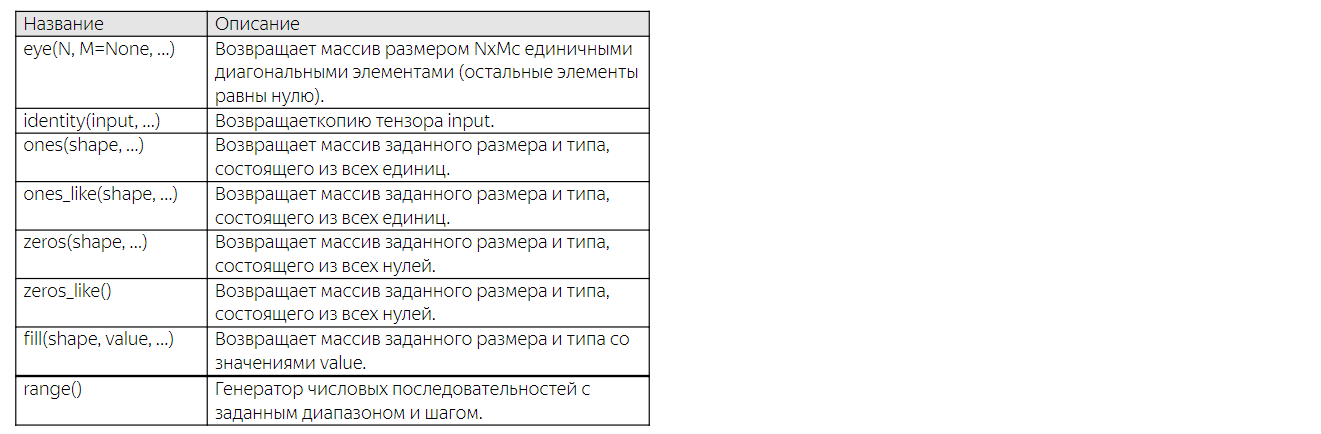

In [75]:
a = tf.zeros((3,3)) 
b = tf.ones((2,3))
c = tf.ones_like(a) # просто определяет форму и тип тензора а и выдает матрицу единиц. Аналогично zeros_like(tensor_name)
d0 = tf.eye(3)
d1 = tf.eye(3, 2)
e = tf.identity(c) 
f = tf.fill((2, 3), -1) 
g = tf.range(1, 11, 0.2)

print(a, b, c, d0, d1, e, f, g, sep = "\n\n", end = '\n\n')

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

tf.Tensor(
[[1. 0.]
 [0. 1.]
 [0. 0.]], shape=(3, 2), dtype=float32)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)

tf.Tensor(
[[-1 -1 -1]
 [-1 -1 -1]], shape=(2, 3), dtype=int32)

tf.Tensor(
[ 1.         1.2        1.4000001  1.6000001  1.8000002  2.0000002
  2.2000003  2.4000003  2.6000004  2.8000004  3.0000005  3.2000005
  3.4000006  3.6000006  3.8000007  4.0000005  4.2000003  4.4
  4.6        4.7999997  4.9999995  5.1999993  5.399999   5.599999
  5.7999988  5.9999986  6.1999984  6.399998   6.599998   6.799998
  6.9999976  7.1999974  7.399997   7.599997   7.799997   7.9999967
  8.199997   8.399997   8.599997   8.799996   8.999996   9.199996
  9.399996 

## Генерация случайных чисел.
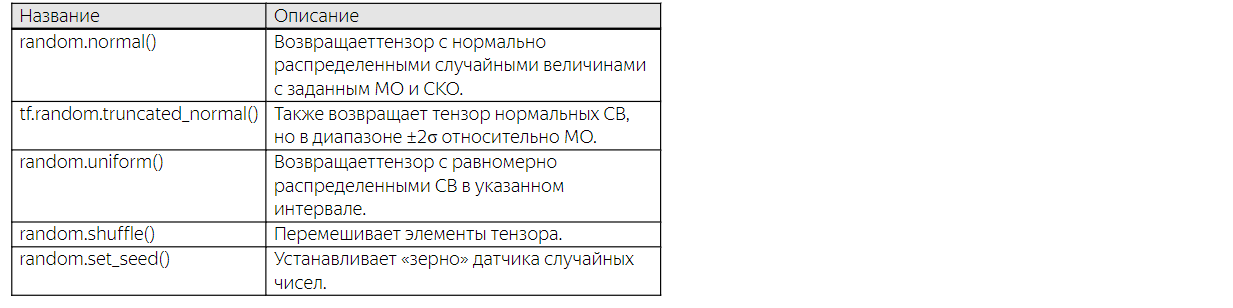

In [79]:
a = tf.random.normal((2, 4), 0, 0.1)  # тензор 2x4 с нормальными СВ
b = tf.random.uniform((2, 2), -1, 1)  # тензор 2x2 с равномерными СВ в диапазоне [-1; 1]
c = tf.random.shuffle(range(10))  # перемешивание последовательности чисел
tf.random.set_seed(13)  # установка зерна датчика случайных чисел
d = tf.random.truncated_normal((1, 5), -1, 0.1)  # тензор 1x5 с ограниченными нормальными СВ
tf.random.set_seed(13)
e = tf.random.truncated_normal((1, 5), -1, 0.1)
print(a, b, c, d, e, sep = "\n\n", end = '\n\n')

tf.Tensor(
[[ 0.04030879 -0.10880208 -0.00630954  0.13365567]
 [ 0.07117601 -0.04892864 -0.07642213 -0.10372486]], shape=(2, 4), dtype=float32)

tf.Tensor(
[[ 0.6585548   0.26845598]
 [ 0.02945518 -0.21783829]], shape=(2, 2), dtype=float32)

tf.Tensor([8 4 7 5 0 2 3 9 1 6], shape=(10,), dtype=int32)

tf.Tensor([[-0.9532663 -0.9100726 -1.0782624 -0.8757098 -0.819652 ]], shape=(1, 5), dtype=float32)

tf.Tensor([[-0.9532663 -0.9100726 -1.0782624 -0.8757098 -0.819652 ]], shape=(1, 5), dtype=float32)



## Математические операции.

In [5]:
a = tf.constant([1, 2, 3])
b = tf.constant([9, 8, 7])
print(a, b, sep="\n\n", end="\n\n")

tf.Tensor([1 2 3], shape=(3,), dtype=int32)

tf.Tensor([9 8 7], shape=(3,), dtype=int32)



In [6]:
o1 = tf.add(a, b)       # сложение
o2 = a + b              # сложение
print('Операция tf.add(a, b):', o1, 'Операция a + b:', o2, sep = '\n', end = '\n\n\n')

o3 = tf.subtract(a, b)  # вычитание
o4 = a - b              # вычитание
print('Операция tf.subtract(a, b):', o3, 'Операция a - b:', o4, sep = '\n', end = '\n\n\n')

o5 = tf.divide(a, b)    # деление (поэлементное)
o6 = a / b              # деление (поэлементное)
print('Операция tf.divide(a, b):', o5, 'Операция a / b:', o6, sep = '\n', end = '\n\n\n')

o7 = tf.multiply(a, b)  # умножение (поэлементное)
o8 = a * b              # умножение (поэлементное)
print('Операция tf.multiply(a, b):', o7, 'Операция a * b:', o8, sep = '\n', end = '\n\n\n')

o9 = a ** 2             # возведение в степень (поэлементное)
print('Операция a ** 2:', o9, sep = '\n', end = '\n\n\n')

o10 = tf.tensordot(a, b, axes=0) # векторное внешнее умножение
o11 = tf.tensordot(a, b, axes=1) # векторное внутреннее умножение
print('Внешнее умножение tf.tensordot(a, b, axes=0):', o10, 
      'Внутреннее умножение tf.tensordot(a, b, axes=1):', o11, sep = '\n', end = '\n\n\n')

a2 = tf.constant(tf.range(1, 10), shape=(3, 3))
b2 = tf.constant(tf.range(5, 14), shape=(3, 3))
print('a2', a2, 'b2', b2, sep = '\n', end = '\n\n\n')
 
o12 = tf.matmul(a2, b2)  # матричное умножение
o13 = a2 @ b2            # матричное умножение
print('Матричное умножение tf.matmul(a2, b2):', o12, 
      'Матричное умножение a2 @ b2:', o13, sep = '\n', end = '\n\n\n')



Операция tf.add(a, b):
tf.Tensor([10 10 10], shape=(3,), dtype=int32)
Операция a + b:
tf.Tensor([10 10 10], shape=(3,), dtype=int32)


Операция tf.subtract(a, b):
tf.Tensor([-8 -6 -4], shape=(3,), dtype=int32)
Операция a - b:
tf.Tensor([-8 -6 -4], shape=(3,), dtype=int32)


Операция tf.divide(a, b):
tf.Tensor([0.11111111 0.25       0.42857143], shape=(3,), dtype=float64)
Операция a / b:
tf.Tensor([0.11111111 0.25       0.42857143], shape=(3,), dtype=float64)


Операция tf.multiply(a, b):
tf.Tensor([ 9 16 21], shape=(3,), dtype=int32)
Операция a * b:
tf.Tensor([ 9 16 21], shape=(3,), dtype=int32)


Операция a ** 2:
tf.Tensor([1 4 9], shape=(3,), dtype=int32)


Внешнее умножение tf.tensordot(a, b, axes=0):
tf.Tensor(
[[ 9  8  7]
 [18 16 14]
 [27 24 21]], shape=(3, 3), dtype=int32)
Внутреннее умножение tf.tensordot(a, b, axes=1):
tf.Tensor(46, shape=(), dtype=int32)


a2
tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
b2
tf.Tensor(
[[ 5  6  7]
 [ 8  9 10]
 [11 12 13]], 

In [8]:
m = tf.tensordot(a, b, axes=0) 
print('Исходная матрица:', m, sep = '\n', end = '\n\n\n')

o14 = tf.reduce_sum(o10) # вычисление суммы элементов (по всем осям)
o15 = tf.reduce_sum(m, axis = 0)    # вычисление суммы элементов (при axis=0 суммируются строки)
o16 = tf.reduce_sum(m, axis = [0, 1])    # вычисление суммы элементов (при axis=0 суммируются строки)
print('Операция tf.reduce_sum(tensor_name):', o14,
      'Операция tf.reduce_sum(tensor_name, axis = 0):', o15,
      'Операция tf.reduce_sum(tensor_name, axis = [0, 1]):', o16,
      sep = '\n', end = '\n\n\n')

o17 = tf.reduce_mean(m)	     # среднее арифметическое
print('Операция tf.reduce_mean(tensor_name):', o17,
      sep = '\n', end = '\n\n\n')

o18 = tf.reduce_max(m, axis=0)      # максимальное по столбцам
o19 = tf.reduce_min(m, axis=1)      # минимальное по строкам
print('Операция tf.reduce_max(tensor_name, axis = 0):', o18,
      'Операция tf.reduce_min(tensor_name, axis = 1):', o19,
      sep = '\n', end = '\n\n\n')

o20 = tf.reduce_prod(m)             # произведение значений элементов матрицы
print('Операция tf.reduce_prod(tensor_name):', o20, sep = '\n', end = '\n\n\n')

o21 = tf.sqrt(tf.cast(m, dtype=tf.float32))   # квадратный корень. работает только с вещественными типами! cast приводит к нужному типу
o22 = tf.square(m)        # возведение в квадрат
o23 = tf.sin(tf.range(-3.14, 3.14, 1))    # синус от значений тензора
o24 = tf.cos(tf.range(-3.14, 3.14, 1))    # косинус от значений тензора
print('Операция tf.sqrt(tensor_name):', o21,
      'Операция tf.square(tensor_name):', o22,
      'Операция tf.sin(tensor_name):', o21,
      'Операция tf.cos(tensor_name):', o22,
      sep = '\n', end = '\n\n\n')

Исходная матрица:
tf.Tensor(
[[ 9  8  7]
 [18 16 14]
 [27 24 21]], shape=(3, 3), dtype=int32)


Операция tf.reduce_sum(tensor_name):
tf.Tensor(144, shape=(), dtype=int32)
Операция tf.reduce_sum(tensor_name, axis = 0):
tf.Tensor([54 48 42], shape=(3,), dtype=int32)
Операция tf.reduce_sum(tensor_name, axis = [0, 1]):
tf.Tensor(144, shape=(), dtype=int32)


Операция tf.reduce_mean(tensor_name):
tf.Tensor(16, shape=(), dtype=int32)


Операция tf.reduce_max(tensor_name, axis = 0):
tf.Tensor([27 24 21], shape=(3,), dtype=int32)
Операция tf.reduce_min(tensor_name, axis = 1):
tf.Tensor([ 7 14 21], shape=(3,), dtype=int32)


Операция tf.reduce_prod(tensor_name):
tf.Tensor(1883394048, shape=(), dtype=int32)


Операция tf.sqrt(tensor_name):
tf.Tensor(
[[3.        2.828427  2.6457512]
 [4.2426405 4.        3.7416575]
 [5.196152  4.8989797 4.582576 ]], shape=(3, 3), dtype=float32)
Операция tf.square(tensor_name):
tf.Tensor(
[[ 81  64  49]
 [324 256 196]
 [729 576 441]], shape=(3, 3), dtype=int32)
О